   # kc house data Analysis and Prediction

In [294]:
import pandas as pd
import numpy as  np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




In [213]:
data=pd.read_csv('kc_house_data.csv',delimiter=',')


In [214]:
data.head()
#notice the varible bedrooms and grade are ordinal variable 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

 lets drop the 'id' column. Not important for us

In [216]:
data.drop('id',inplace=True,axis=1)


there should be interger in columns 'bathrooms' and 'floors' not float numbers. Let's turn them on integers

In [217]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

In [218]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Engineer Datetime Features


Out Date is of type object and our unsupervised Machine Learning algorithms only work with numeric variables so we've to convert date object into numbers 
[NOTE]Decision trees, Regression trees, and ensemble-based on these methods can handle categorical data

In [219]:
data['date'] = pd.to_datetime(data['date'])

By converting the strings into datetimes, this exposes all the pandas dt properties.

![title](date.png)


In [220]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['day'] = data['date'].dt.day
#data['hour'] = data['date'].dt.hour
#data['minute'] = data['date'].dt.minute
data['dayofweek'] = data['date'].dt.dayofweek

C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


I would start by graphing the time variable vs other variables and looking for trends.



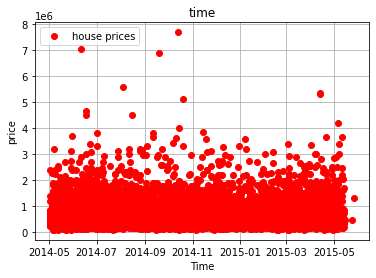

In [221]:
plt.plot(data['date'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('time')
plt.grid(True)
plt.legend(loc='upper left');

there's no seasonality, Periodic pattern, or trend in daily data that means we don't need any new feature to catch any seasonality, Periodic pattern, or trend but let's resample our data on different time scales for further analysis and drop some feaure that we generated from date

In [222]:
data=data.drop(['date'],axis='columns')


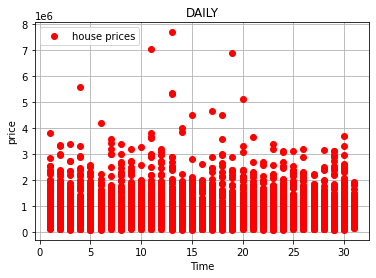

In [96]:
plt.plot(data['day'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('DAILY')
plt.grid(True)
plt.legend(loc='upper left');

In [223]:
data=data.drop(['day'],axis='columns')


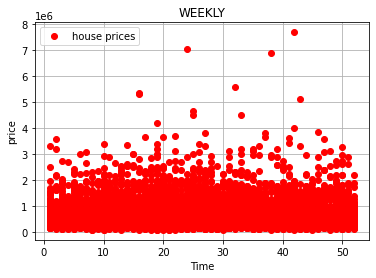

In [98]:
plt.plot(data['week'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('WEEKLY')
plt.grid(True)
plt.legend(loc='upper left');

there's no seasonality, Periodic pattern, or trend in weekly data lets drop this feaure 

In [224]:
data=data.drop(['week'],axis='columns')


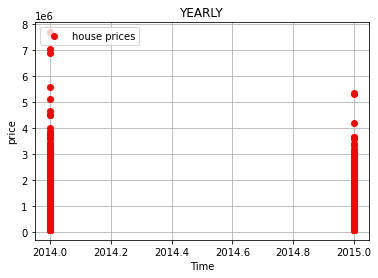

In [225]:
plt.plot(data['year'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('YEARLY')
plt.grid(True)
plt.legend(loc='upper left');

usually you will keep year feature even tho there is not much infomation

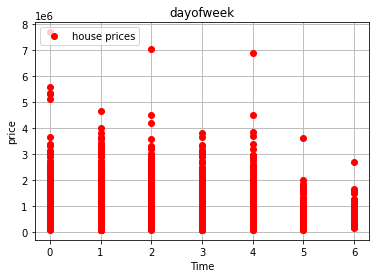

In [226]:
plt.plot(data['dayofweek'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('dayofweek')
plt.grid(True)
plt.legend(loc='upper left');

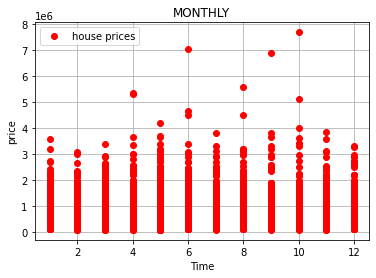

In [227]:
plt.plot(data['month'],data['price'],'ro',label='house prices')
plt.xlabel('Time')
plt.ylabel('price')
plt.title('MONTHLY')
plt.grid(True)
plt.legend(loc='upper left');

By doing TimeSeries analysis we came to conclusion there is no periodic daily,weekly.monthly or annual trend in our data. So you would not want to encode any more time variables

<AxesSubplot:xlabel='year', ylabel='price'>

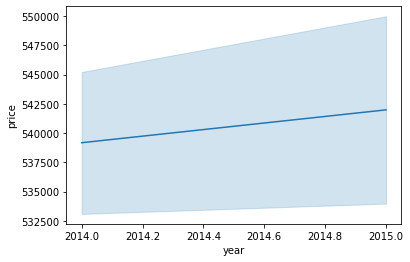

In [228]:

sns.lineplot(x='year',y='price',data=data)

A linear analysis showing us the increase of the price along the years that's kind of what you would expect from correct data

<AxesSubplot:xlabel='grade', ylabel='price'>

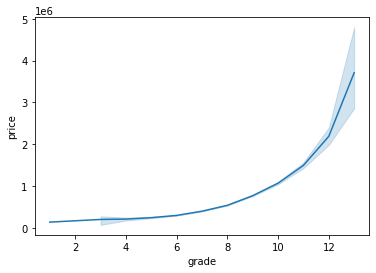

In [104]:
sns.lineplot(x='grade',y='price',data=data)

the higher the grade the higher the price and our this graph confirms it aswell

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

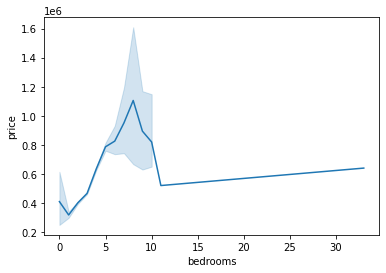

In [105]:
sns.lineplot(x='bedrooms',y='price',data=data)

this plot is an interesting one cause I was expecting linear growth in prices with an increase in the number of bedrooms and this graph shows a sharp decline in price after 8 bedrooms which indicates bedrooms alone are not a good indicator of price and later we will see there is a 0.5 correlation between bedrooms and price

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

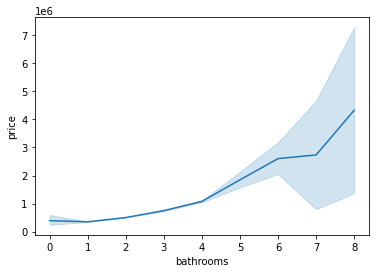

In [106]:
sns.lineplot(x='bathrooms',y='price',data=data)

this plot indicates number of bathrooms is a  better indicator of price as compare to bedrooms tho there is still high varince from bathrooms value 4 to 8

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

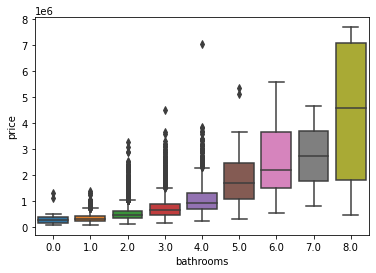

In [107]:
sns.boxplot(x='bathrooms',y='price',data=data)

<AxesSubplot:xlabel='grade', ylabel='price'>

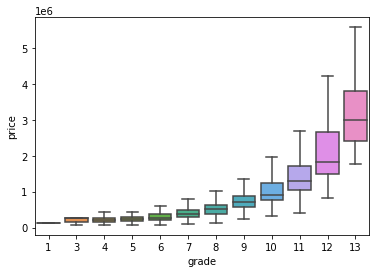

In [108]:

sns.boxplot(x='grade',y='price',data=data,showfliers=False)

In [110]:
#df.corr()
'''compute the standard
correlation coefficient (also called Pearson’s r) between every pair of
attributes using the corr() method:'''
corr_matrix=data.corr()

In [111]:
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,dayofweek
price,1.000000,0.308350,0.518912,0.702035,0.089661,0.244906,0.266369,0.397293,0.036362,0.667434,...,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.001695
bedrooms,0.308350,1.000000,0.489609,0.576671,0.031703,0.177778,-0.006582,0.079532,0.028472,0.356967,...,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533,0.009843
bathrooms,0.518912,0.489609,1.000000,0.701784,0.089988,0.326466,0.065428,0.202647,-0.066685,0.591269,...,0.377433,0.069322,-0.144088,0.049235,0.149157,0.497484,0.086952,-0.024469,0.009359,0.005006
sqft_living,0.702035,0.576671,0.701784,1.000000,0.172826,0.321987,0.103818,0.284611,-0.058753,0.762704,...,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,0.005152
sqft_lot,0.089661,0.031703,0.089988,0.172826,1.000000,-0.001947,0.021604,0.074710,-0.008958,0.113621,...,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369,-0.002758
floors,0.244906,0.177778,0.326466,0.321987,-0.001947,1.000000,0.025839,0.027971,-0.223259,0.407675,...,0.381396,0.015424,-0.022506,0.064603,0.088845,0.242730,-0.010895,-0.022473,0.013963,0.004277
waterfront,0.266369,-0.006582,0.065428,0.103818,0.021604,0.025839,1.000000,0.401857,0.016653,0.082775,...,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132,-0.004668
view,0.397293,0.079532,0.202647,0.284611,0.074710,0.027971,0.401857,1.000000,0.045990,0.251321,...,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638,0.006186
condition,0.036362,0.028472,-0.066685,-0.058753,-0.008958,-0.223259,0.016653,0.045990,1.000000,-0.144674,...,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978,0.007011
grade,0.667434,0.356967,0.591269,0.762704,0.113621,0.407675,0.082775,0.251321,-0.144674,1.000000,...,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.030387,0.008376,0.002092


In [112]:
corr_matrix['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.518912
sqft_living      0.702035
sqft_lot         0.089661
floors           0.244906
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
year             0.003576
month           -0.010081
dayofweek       -0.001695
Name: price, dtype: float64

## Scatterplot Matrix

scatter plot matrix represents bi-variate or pairwise relationship between different combinations of variables
Scatter plot matrix is also referred to as pair plot as it consists of scatter plots of different variables combined in pairs
we don't do this if we got more than 10 cause it will plot 10^10 plots & histrograms, Histrogram are actually distribution 
of variable and they don't plot graph for x againt x 


[Features correlation:]
Assess pairwise relationships between three or more variables. This is important to understand 
relationships between different features when building machine learning model

[Multicollinearity:] 
Assess the collinearity / multi-collinearity by analyzing the correlation between two or more variables.
Recall that multi-collinearity can result in two or more predictor variables that might be providing the same information about the response variable thereby leading to unreliable coefficients of the predictor variables (especially for linear models

[Data is linearly separable?:]
Assess whether the data is linearly separable or not. The data which is linearly separable can be
separated using a linear line. The data which isn't linearly separable would need to be applied with kernel methods. Thus, 
it may help determine machine learning algorithm one would want to use.

One can analyse the pairwise relationship at several stages of machine learning model pipeline including some of the following:
Data analysis
Before and after feature transformations
Feature engineering
Feature selection

Option1: from pandas.plotting import scatter_matrix
Option2: import seaborn as sns.pairplot

C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Syed Muhammmad Hamza\anaconda3\envs\PY37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


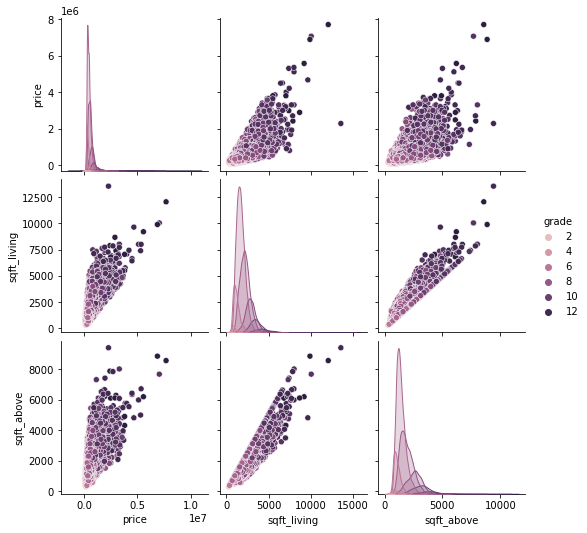

In [113]:

vars=["price","sqft_living","sqft_above","grade"]
sns.pairplot(data[vars], hue='grade')   

In [76]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'dayofweek'],
      dtype='object')

In [229]:

x=data.drop(['price'],axis='columns')
y=data.iloc[:,0]

## Normalization using sklearn


Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
In problems like our Regression we have Gaussain distribution A.K.A Normal distribution but just for demonstration here'show you will do it

In [158]:
'''
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x)

# transform training data
X_norm = norm.transform(x)
'''


'\n# data normalization with sklearn\nfrom sklearn.preprocessing import MinMaxScaler\n\n# fit scaler on training data\nnorm = MinMaxScaler().fit(x)\n\n# transform training data\nX_norm = norm.transform(x)\n'

## Standardization using sklearn

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


clearly in our problem there is no effect at all of standardization and Normalization that just points to the fact our data does not need Feature Scaling

In [230]:
# data standardization with  sklearn
std = StandardScaler()
x = std.fit_transform(x)



In [162]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split

In [164]:
#x=x.drop('date',axis='columns')


In [232]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state = 0)

In [233]:
type(x_train)

numpy.ndarray

## LinearRegression

In [297]:
model =linear_model.LinearRegression()
model.fit(x_train,y_train)
y_prid=model.predict(x_test)

Accuracy (e.g. classification accuracy) is a measure for classification, not regression.
We cannot calculate accuracy for a regression model.
The skill or performance of a regression model must be reported as an error in those predictions.

This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values.

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

1)Mean Squared Error (MSE).
2)Root Mean Squared Error (RMSE).
3)Mean Absolute Error (MAE)

In [298]:
print("Train Accuracy : ",(model.score(x_train,y_train))*100)
print("Test Accuracy : ",(model.score(x_test,y_test))*100)
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
print("Mean Squared Error",mean_squared_error(y_test, y_prid))
print("Root Mean Squared Error",mean_squared_error(y_test, y_prid,squared=False))
print("Mean Absolute Error",mean_absolute_error(y_test, y_prid))


Train Accuracy :  70.29292527894575
Test Accuracy :  69.80990801636075
Mean Squared Error 35903346291.52909
Root Mean Squared Error 189481.78353480075
Mean Absolute Error 121243.6897093018


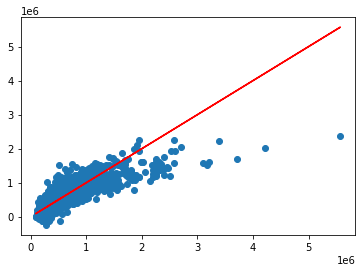

In [299]:
plt.scatter(y_test,y_prid)
plt.plot(y_test,y_test,color='red')

## RegressionTree

In [300]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [301]:
y_prid=regressor.predict(x_test)

In [302]:

print("Train Accuracy : ",(regressor.score(x_train,y_train))*100)
print("Test Accuracy : ",(regressor.score(x_test,y_test))*100)
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
print("Mean Squared Error",mean_squared_error(y_test, y_prid))
print("Root Mean Squared Error",mean_squared_error(y_test, y_prid,squared=False))
print("Mean Absolute Error",mean_absolute_error(y_test, y_prid))


Train Accuracy :  99.99999986969239
Test Accuracy :  77.23649671365244
Mean Squared Error 27071329949.60745
Root Mean Squared Error 164533.67421171707
Mean Absolute Error 95349.5468424705


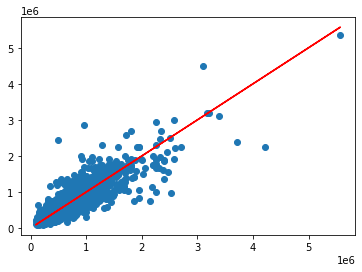

In [303]:
plt.scatter(y_test,y_prid)
plt.plot(y_test,y_test,color='red')

## Ensemble Learning Bagging(RandomForestRegressor)

In [305]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_prid=model.predict(x_test)

In [306]:

print("Train Accuracy : ",(model.score(x_train,y_train))*100)
print("Test Accuracy : ",(model.score(x_test,y_test))*100)
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
print("Mean Squared Error",mean_squared_error(y_test, y_prid))
print("Root Mean Squared Error",mean_squared_error(y_test, y_prid,squared=False))
print("Mean Absolute Error",mean_absolute_error(y_test, y_prid))


Train Accuracy :  98.24784452226893
Test Accuracy :  89.29150356935301
Mean Squared Error 12735001132.804628
Root Mean Squared Error 112849.46226192055
Mean Absolute Error 64507.989730896756


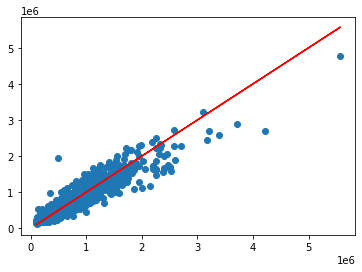

In [307]:
plt.scatter(y_test,y_prid)
plt.plot(y_test,y_test,color='red')

## Ensemble Learning Boosting(XGboost)

In [309]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 300)

In [310]:
xg_reg.fit(x_train,y_train)
y_prid = xg_reg.predict(x_test)



[11:47:42] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [311]:
print("Train Accuracy : ",(xg_reg.score(x_train,y_train))*100)
print("Test Accuracy : ",(xg_reg.score(x_test,y_test))*100)
#rms = mean_squared_error(y_actual, y_predicted, squared=False)
print("Mean Squared Error",mean_squared_error(y_test, y_prid))
print("Root Mean Squared Error",mean_squared_error(y_test, y_prid,squared=False))
print("Mean Absolute Error",mean_absolute_error(y_test, y_prid))

Train Accuracy :  96.36776151025393
Test Accuracy :  90.39554109286699
Mean Squared Error 11422032575.204823
Root Mean Squared Error 106873.90970299918
Mean Absolute Error 62146.428601376356


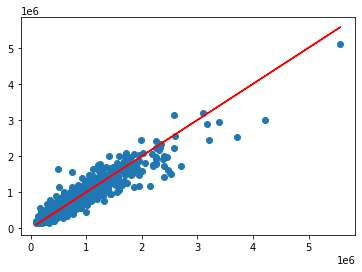

In [312]:
plt.scatter(y_test,y_prid)
plt.plot(y_test,y_test,color='red')
